In [1]:

import pandas as pd
import numpy as nu
import datetime as datatoday
import unidecode as unidecode

C:\Users\jvicl\AppData\Local\Temp\ipykernel_10976\331855653.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


A base de dados selecionada é composta pelas Carteiras de Trabalho e Previdência Social (CTPS) emitidas no país em 2020. Essas carteiras contêm informações sobre as vias de emissão, datas de emissão, localidades e dados dos solicitantes, como idade, localidade, escolaridade, raça, estado civil e tipo de cidadania.

Com base nesses dados, é possível analisar diversos aspectos relacionados à força de trabalho durante esse período. Além disso, podemos investigar relações entre raça, sexo e outros fatores relevantes. Essa análise pode fornecer insights valiosos para políticas públicas, estratégias de emprego e igualdade de oportunidades.


In [2]:
df=pd.read_csv('basectps.csv',delimiter=";")
display(df)

,",protocolo,municipio,uf,emissao,sexo,escolaridade,raca,estadocivil,nascimento,idade,cidadania,municipio_nascimento,uf_nascimento,escolaridade_condensada"
0,"0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPER..."
1,"1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU..."
2,"2,1ª Via,BELEM,PA,04/02/2020,FEMININO,2º GRAU ..."
3,"3,2ª Via,VITORIA DA CONQUISTA,BA,03/03/2020,MA..."
4,"4,2ª Via,CORUMBIARA,RO,30/01/2020,FEMININO,2º ..."
...,...
463933,"463933,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMIN..."
463934,"463934,1ª Via,MARTINOPOLIS,SP,30/12/2020,MASCU..."
463935,"463935,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMIN..."
463936,"463936,2ª Via,BRUSQUE,SC,14/12/2020,FEMININO,2..."


In [3]:
#as duas ultimas colunas referem-se ao municipio e uf de nascimento do solicitante, para ajustas, vamos renomar as colunas
novo_nome_colunas = {
    "municipio.1": "municipio_nascimento",
    "uf.1": "uf_nascimento"
}

df = df.rename(columns=novo_nome_colunas)
display(df)

,",protocolo,municipio,uf,emissao,sexo,escolaridade,raca,estadocivil,nascimento,idade,cidadania,municipio_nascimento,uf_nascimento,escolaridade_condensada"
0,"0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPER..."
1,"1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU..."
2,"2,1ª Via,BELEM,PA,04/02/2020,FEMININO,2º GRAU ..."
3,"3,2ª Via,VITORIA DA CONQUISTA,BA,03/03/2020,MA..."
4,"4,2ª Via,CORUMBIARA,RO,30/01/2020,FEMININO,2º ..."
...,...
463933,"463933,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMIN..."
463934,"463934,1ª Via,MARTINOPOLIS,SP,30/12/2020,MASCU..."
463935,"463935,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMIN..."
463936,"463936,2ª Via,BRUSQUE,SC,14/12/2020,FEMININO,2..."


In [4]:
#tem conteúdo vazio, vamos dropar:
df = df.dropna()
display(df)

,",protocolo,municipio,uf,emissao,sexo,escolaridade,raca,estadocivil,nascimento,idade,cidadania,municipio_nascimento,uf_nascimento,escolaridade_condensada"
0,"0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPER..."
1,"1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU..."
2,"2,1ª Via,BELEM,PA,04/02/2020,FEMININO,2º GRAU ..."
3,"3,2ª Via,VITORIA DA CONQUISTA,BA,03/03/2020,MA..."
4,"4,2ª Via,CORUMBIARA,RO,30/01/2020,FEMININO,2º ..."
...,...
463933,"463933,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMIN..."
463934,"463934,1ª Via,MARTINOPOLIS,SP,30/12/2020,MASCU..."
463935,"463935,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMIN..."
463936,"463936,2ª Via,BRUSQUE,SC,14/12/2020,FEMININO,2..."


In [5]:
#Vamos condensar o nível de escolaridade para facilitar nas análises:
escolaridade_condensada = {
    "1º GRAU COMPLETO ATÉ 8ª SÉRIE COMP.": "Fundamental Completo",
    "1º GRAU INCOMP. 5ª A 8ª SÉRIE INCOMP.": "Fundamental Incompleto",
    "1º GRAU INCOMP. ATÉ A 4ª SÉRIE INCOMP.": "Fundamental Incompleto",
    "1º GRAU INCOMPLETO ATÉ A 4ª SÉRIE COMP.": "Fundamental Incompleto",
    "2º GRAU COMPLETO OU TEC. PROFISSIONAL": "Ensino Médio Completo",
    "2º GRAU INCOMPLETO": "Ensino Médio Incompleto",
    "ALFABETIZADO SEM CURSOS REGULARES": "Alfabetizado",
    "ANALFABETO": "Analfabeto",
    "APERFEICOAMENTO": "Aperfeiçoamento",
    "DOUTORADO": "Doutorado",
    "ESPECIALIZACAO": "Especialização",
    "LIVRE DOCENCIA": "Livre Docência",
    "MESTRADO": "Mestrado",
    "PHD": "Doutorado",
    "POS DOCTOR": "Pós-Doutorado",
    "POS GRADUACAO": "Pós-Graduação",
    "SEMIANALFABETO": "Semianalfabeto",
    "SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.": "Superior Completo",
    "SUPERIOR INCOMPLETO": "Superior Incompleto",
}


df["escolaridade_condensada"] = df["escolaridade"].apply(lambda x: escolaridade_condensada[x])

df.to_csv("basectps.csv")
display(df)

KeyError: 'escolaridade'

In [ ]:
#a coluna idade tem conteúdo fracionário e se a idade está em anos, deveria ser inteiro. 
df['idade'] = df['idade'].astype(int)
display(df)

,protocolo,municipio,uf,emissao,sexo,escolaridade,raca,estadocivil,nascimento,idade,cidadania,municipio_nascimento,uf_nascimento,escolaridade_condensada
0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.,Pardo,SOLTEIRO,07/05/1985,39,Brasileiro Nato,ALTOS,PI,Superior Completo
1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU INCOMPLETO,Pardo,CASADO,01/08/1994,30,Brasileiro Nato,GONCALVES DIAS,MA,Ensino Médio Incompleto
2,1ª Via,BELEM,PA,04/02/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,23/03/1975,49,Brasileiro Nato,MARABA,PA,Ensino Médio Completo
3,2ª Via,VITORIA DA CONQUISTA,BA,03/03/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,CASADO,04/09/1986,38,Brasileiro Nato,CONDEUBA,BA,Ensino Médio Completo
4,2ª Via,CORUMBIARA,RO,30/01/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SEPARADO,21/10/1984,40,Brasileiro Nato,BETIM,MG,Ensino Médio Completo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463933,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,07/01/2003,21,Brasileiro Nato,MARTINOPOLIS,SP,Ensino Médio Completo
463934,1ª Via,MARTINOPOLIS,SP,30/12/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,28/01/2002,22,Brasileiro Nato,MARTINOPOLIS,SP,Ensino Médio Completo
463935,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,07/11/2001,23,Brasileiro Nato,MARTINOPOLIS,SP,Ensino Médio Completo
463936,2ª Via,BRUSQUE,SC,14/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,20/12/1987,37,Brasileiro Nato,LAGES,SC,Ensino Médio Completo


Análises:

Vamos ver a distribuição por idade, sexo e nível de escolaridade:

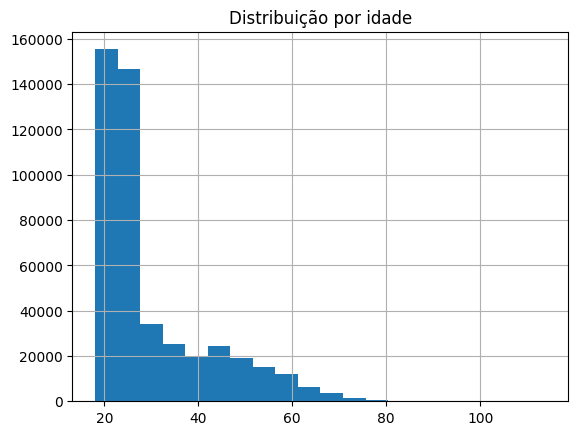

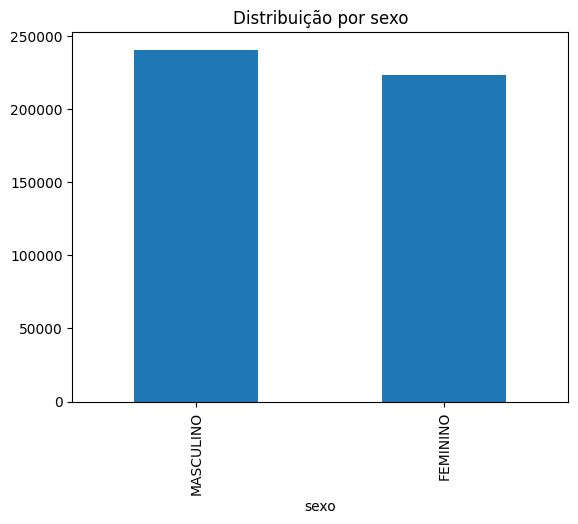

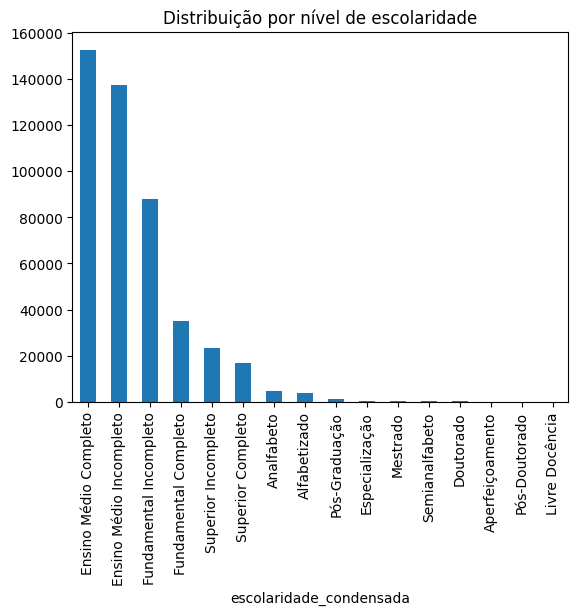

In [ ]:
import matplotlib.pyplot as plt


df = pd.read_csv("basectps.csv")


df['idade'].hist(bins=20)
plt.title('Distribuição por idade')
plt.show()

df['sexo'].value_counts().plot.bar()
plt.title('Distribuição por sexo')
plt.show()


df['escolaridade_condensada'].value_counts().plot.bar()
plt.title('Distribuição por nível de escolaridade')
plt.show()

Vamos comparar as médias de idade  e nível de escolaridade:

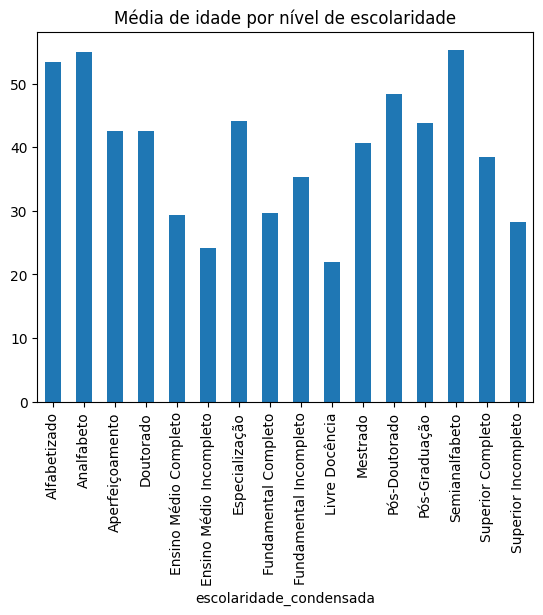

In [ ]:

df.groupby('escolaridade_condensada')['idade'].mean().plot.bar()
plt.title('Média de idade por nível de escolaridade')
plt.show()